## Step 1: Data Collections

In [68]:
# we use preprocessed data of movies review from standford educatons
! wget https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

--2024-09-21 16:17:17--  https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz.2’

aclImdb_v1.tar.gz.2 100%[===================>]  80.23M  7.07MB/s    in 17s     

2024-09-21 16:17:35 (4.65 MB/s) - ‘aclImdb_v1.tar.gz.2’ saved [84125825/84125825]



## Step 2 : Data Extraction

In [69]:
import tarfile

# Path to your .tar file
tar_file_path = "/content/aclImdb_v1.tar.gz"

# Open the .tar file
with tarfile.open(tar_file_path, 'r') as tar:
    # Extract all contents to the current directory
    tar.extractall(path="desired_extraction_path")

print("Extraction completed!")

Extraction completed!


## Step 3: Data Preprocessing


In [70]:
# see the train & testing data

import os

def load_data(directory):
    data, labels = [], []
    for label_type in ['pos', 'neg']:
        path = os.path.join(directory, label_type)
        label = 1 if label_type == 'pos' else 0
        for file in os.listdir(path):
            with open(os.path.join(path, file), 'r', encoding='utf-8') as f:
                data.append(f.read())
                labels.append(label)
    return data, labels

# Paths to train and test directories
train_dir = '/content/desired_extraction_path/aclImdb/train'
test_dir = '/content/desired_extraction_path/aclImdb/test'

# Load training and testing data
train_data, train_labels = load_data(train_dir)
test_data, test_labels = load_data(test_dir)

print(f"Train samples: {len(train_data)}, Test samples: {len(test_data)}")


Train samples: 25000, Test samples: 25000


In [71]:
# Count missing entries in the training data
missing_entries = [i for i, review in enumerate(train_data) if not review.strip()]
num_missing = len(missing_entries)

print(f"Number of missing entries in training data: {num_missing}")
if num_missing > 0:
    print("Indices of missing entries:", missing_entries)


Number of missing entries in training data: 0


In [72]:
# Display the first 5 training reviews
for i in range(5):
    print(f"Review {i + 1}:")
    print(train_data[i])
    print("-" * 50)  # Separator


Review 1:
I borrowed this movie despite its extremely low rating, because I wanted to see how the crew manages to animate the presence of multiple worlds. As a matter of fact, they didn't - at least, so its seems. Some cameo appearance cut rather clumsily into the movie - that's it, this is what the majority of viewers think. However, the surprise comes at the end, and unfortunately then, when probably most of the viewers have already stopped this movie. I was also astonished when I saw that the Brazilian-Portuguese title of this movie means "Voyage into Death". This is THE spoiler.<br /><br />That this movie is about a young girl who goes ALONE onto this boat (on reasons that are completely unclear), you understand only in the last 5 minutes. When you start the movie with the English title "Haunted Boat" in your head, you clearly think that the cameo appearances of strange figures are the "ghosts". But in reality, this movie is not like most other horror movies told from the distant w

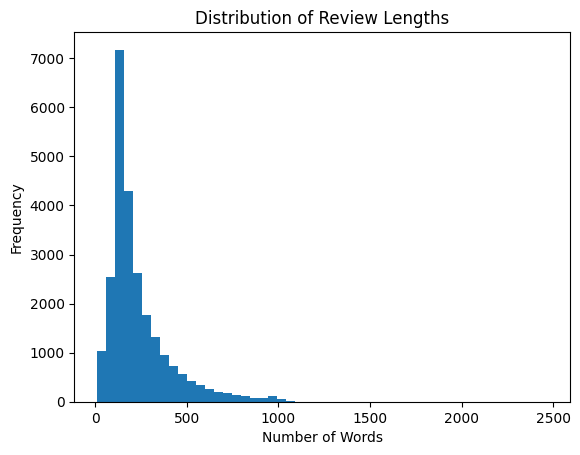

In [73]:
import matplotlib.pyplot as plt

review_lengths = [len(review.split()) for review in train_data]
plt.hist(review_lengths, bins=50)
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


In [74]:
# while observaing the data we saw that it's not properly preprocessed so we are remoing the HTML tafgs from review dataset

from bs4 import BeautifulSoup

def preprocess_text(train_data):
    # Ensure that text is a string
    text = str(text)
    return BeautifulSoup(text, "html.parser").get_text()


In [75]:
# Display more training reviews (e.g., first 10)
for i in range(10):
    label = "Positive" if train_labels[i] == 1 else "Negative"
    print(f"Review {i + 1} ({label}):")
    print(train_data[i])
    print("-" * 50)  # Separator


Review 1 (Positive):
I borrowed this movie despite its extremely low rating, because I wanted to see how the crew manages to animate the presence of multiple worlds. As a matter of fact, they didn't - at least, so its seems. Some cameo appearance cut rather clumsily into the movie - that's it, this is what the majority of viewers think. However, the surprise comes at the end, and unfortunately then, when probably most of the viewers have already stopped this movie. I was also astonished when I saw that the Brazilian-Portuguese title of this movie means "Voyage into Death". This is THE spoiler.<br /><br />That this movie is about a young girl who goes ALONE onto this boat (on reasons that are completely unclear), you understand only in the last 5 minutes. When you start the movie with the English title "Haunted Boat" in your head, you clearly think that the cameo appearances of strange figures are the "ghosts". But in reality, this movie is not like most other horror movies told from th

In [76]:
# still some HTML tags are present in review's

from bs4 import BeautifulSoup

def preprocess_text(text):
    return BeautifulSoup(text, "html.parser").get_text()

# Example review
review = """In anticipation of Ang Lee's new movie "Crouching Tiger, Hidden Dragon," I saw this at blockbuster..."""
cleaned_review = preprocess_text(review)
print("Cleaned Review:", cleaned_review)


Cleaned Review: In anticipation of Ang Lee's new movie "Crouching Tiger, Hidden Dragon," I saw this at blockbuster...


In [77]:
# data cleaning from tags

train_data_cleaned = [preprocess_text(review) for review in train_data]
test_data_cleaned = [preprocess_text(review) for review in test_data]


<ipython-input-76-ad4ada6706ef>:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()


In [78]:
# Display cleaned reviews for training data

for i in range(5):
    print(f"Cleaned Review of trained dataset: {i + 1}:")
    print(train_data_cleaned[i])
    print("-" * 50)  # Separator


Cleaned Review of trained dataset: 1:
I borrowed this movie despite its extremely low rating, because I wanted to see how the crew manages to animate the presence of multiple worlds. As a matter of fact, they didn't - at least, so its seems. Some cameo appearance cut rather clumsily into the movie - that's it, this is what the majority of viewers think. However, the surprise comes at the end, and unfortunately then, when probably most of the viewers have already stopped this movie. I was also astonished when I saw that the Brazilian-Portuguese title of this movie means "Voyage into Death". This is THE spoiler.That this movie is about a young girl who goes ALONE onto this boat (on reasons that are completely unclear), you understand only in the last 5 minutes. When you start the movie with the English title "Haunted Boat" in your head, you clearly think that the cameo appearances of strange figures are the "ghosts". But in reality, this movie is not like most other horror movies told fr

In [79]:
# Display cleaned reviews for test dataset

for i in range(5):
    print(f"Cleaned Review of test dataset:{i + 1}:")
    print(test_data_cleaned[i])
    print("-" * 50)  # Separator

Cleaned Review of test dataset:1:
An exquisite film. They just don't make them like this any more! We eavesdrop on an upper middle class family in Dublin in the early part of the 20th century. They are hosting an after Christmas dinner for their friends and relatives. Their table talk is just idle chatter but it is so well written that one is engrossed. Away from the dinner table some fine piano playing helps to create an intimate atmosphere as if one were there as one of the guests. Perhaps a bit too perfect for an amateur player, the odd mistake here and there would have added to the magic of this film. No real story but real entertainment and an object lesson for up and coming film makers.
--------------------------------------------------
Cleaned Review of test dataset:2:
Strange but acceptable mob comedy that has an undercover FBI agent (Matthew Modine) flirting with a mobster's concerned widow (Michelle Pfeffier) to tie two murders on a elusive mob boss (Dean Stockwell).The movie

## Step 4: Training the Model


### Step 4.1: Feature Extractions

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create and fit the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=25000)  # Adjust max_features as needed
tfidf_vectorizer.fit(train_data_cleaned)  # Fit on your cleaned training data

# Transform both the training and test data
X_train_tfidf = tfidf_vectorizer.transform(train_data_cleaned)
X_test_tfidf = tfidf_vectorizer.transform(test_data_cleaned)  # Assuming you have cleaned test data


### Step 4.2: Train a Sentiment Classification Model

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import joblib  # For saving the model later

# Splitting the training data if needed
X_train, X_val, y_train, y_val = train_test_split(X_train_tfidf, train_labels, test_size=0.2, random_state=42)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model on the validation set
val_accuracy = model.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


Validation Accuracy: 88.50%


### Step 4.3: Sava the model

In [82]:
joblib.dump(model, 'sentiment_model.pkl')  # Save the trained model


['sentiment_model.pkl']

### Step 4.4: Prediction on the test data

In [83]:
# Predict on the test set
test_predictions = model.predict(X_test_tfidf)

# Evaluate the predictions
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have the true labels for your test set
accuracy = accuracy_score(test_labels, test_predictions)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(classification_report(test_labels, test_predictions))


Test Accuracy: 88.05%
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     12500
           1       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



## Step 5: Hyperparameter tuning

In [84]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'saga']  # Different solvers
}

# Initialize the grid search
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters: {'C': 10, 'solver': 'liblinear'}
Best cross-validation score: 0.8894500000000001


### Cross Validation

In [85]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train_tfidf, train_labels, cv=5)
print("Cross-validated scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


Cross-validated scores: [0.8804 0.8776 0.8874 0.9002 0.8898]
Mean cross-validation score: 0.8870799999999999


## Step 6:Visualization

### Confusion Matrix

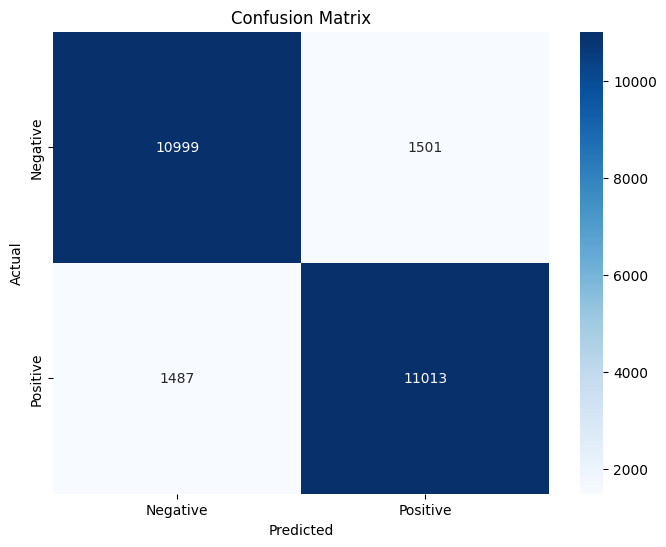

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(test_labels, test_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


### ROC Score

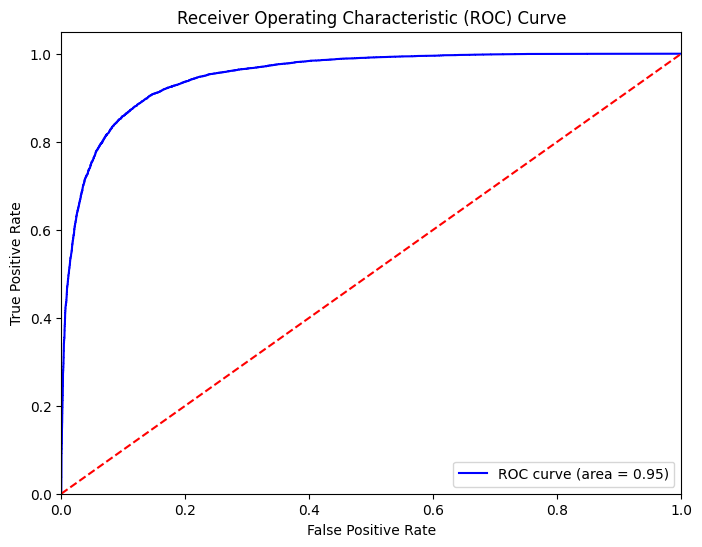

In [87]:
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(test_labels, model.predict_proba(X_test_tfidf)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### Precision-recall curve

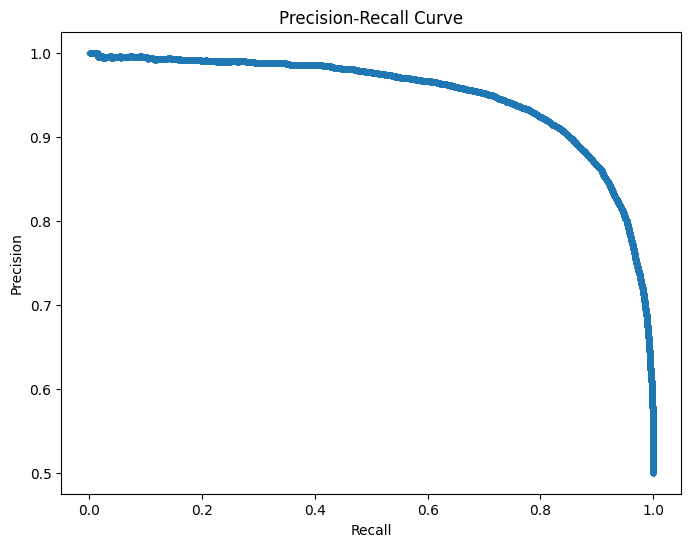

In [88]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(test_labels, model.predict_proba(X_test_tfidf)[:, 1])

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [89]:
# using the XGBoost for binary classification

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import joblib  # For saving the model later
from sklearn.feature_extraction.text import TfidfVectorizer

# Create and fit the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=20000)  # Adjust max_features as needed
tfidf_vectorizer.fit(train_data_cleaned)  # Fit on your cleaned training data

# Transform both the training and test data
X_train_tfidf = tfidf_vectorizer.transform(train_data_cleaned)
X_test_tfidf = tfidf_vectorizer.transform(test_data_cleaned)  # Assuming you have cleaned test data

# Splitting the training data if needed
X_train, X_val, y_train, y_val = train_test_split(X_train_tfidf, train_labels, test_size=0.2, random_state=42)

#  Create and Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust n_estimators as needed
rf_classifier.fit(X_train, y_train)

#Make Predictions
y_pred = rf_classifier.predict(X_test_tfidf)

# Evaluate the model on the validation set
val_accuracy = rf_classifier.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Validation Accuracy: 83.70%


In [90]:
# using the XGBoost for binary classification

import xgboost as xgb
from sklearn.model_selection import train_test_split
import joblib  # For saving the model later
from sklearn.feature_extraction.text import TfidfVectorize

# Splitting the training data if needed
X_train, X_val, y_train, y_val = train_test_split(X_train_tfidf, train_labels, test_size=0.2, random_state=42)

# Step 3: Create and Train the XGBoost Classifier
xgboost_classifier = xgb.XGBClassifier(eval_metric='logloss')
xgboost_classifier.fit(X_train, y_train)

# Step 4: Make Predictions
y_pred = xgboost_classifier.predict(X_test_tfidf)

# Evaluate the model on the validation set
val_accuracy = xgboost_classifier.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Validation Accuracy: 85.28%


### We getting better Accuracy for Logistic Rgression then XGB & Random Forest.



*   XGBosst with Validation Accuracy : 85.90%
*   Random Forest Classifier with Validation Accuracy : 83.70%
*   Logistic Regression with Validation Accuracy : 88.05%



In [91]:
# So, here we are using the Logistic Regression for Sentiment Prediction

def predict_sentiment(review):
    # Preprocess the input review
    cleaned_review = preprocess_text(review)  # Use your preprocessing function
    # Transform the review to TF-IDF
    review_tfidf = tfidf_vectorizer.transform([cleaned_review])
    # Predict sentiment
    prediction = model.predict(review_tfidf)
    return "Positive" if prediction[0] == 1 else "Negative"


In [92]:
def main():
    print("Welcome to the Sentiment Analysis Model!")
    print("Type 'exit' to quit.")

    while True:
        review = input("Enter a movie review: ")
        if review.lower() == 'exit':
            break
        sentiment = predict_sentiment(review)
        print(f"Predicted Sentiment: {sentiment}")

if __name__ == "__main__":
    main()


Welcome to the Sentiment Analysis Model!
Type 'exit' to quit.
Enter a movie review: I couldn't connect with any of the characters, and the plot was boring and predictable.
Predicted Sentiment: Negative
Enter a movie review: This is one of the best movies I have ever seen! It made me laugh, cry, and think deeply about life.
Predicted Sentiment: Positive
Enter a movie review: An absolute disappointment! The trailer was misleading, and I regret watching it
Predicted Sentiment: Negative
Enter a movie review: A heartwarming tale with brilliant performances. The plot twists were unexpected and well executed.
Predicted Sentiment: Positive
Enter a movie review: This movie was an absolute masterpiece! The storyline was engaging, and the acting was top-notch
Predicted Sentiment: Positive
Enter a movie review: exit
